## 4.2　損失関数

　ニューラルネットワークの学習では、損失関数という「ひとつの指標」によって現在の状態を表します。そして、損失関数を基準として最適な重みパラメータの探索を行うのです。なお、損失関数には任意の関数を用いることができますが、一般には、2乗和誤差や交差エントロピー誤差が用いられます。
 
## 4.2.1　2乗和誤差

　2乗和誤差は次のように表されます。

$$E=\frac{1}{2}\displaystyle\sum_{k}^{}\left(y_k - t_k\right)^{2}$$

ここで，y<sub>k</sub>はニューラルネットワークの出力，t<sub>k</sub>は教師データを表し，kはデータの次元数を表します。ニューラルネットワークの出力(y<sub>k</sub>)<sub>※</sub>と正解となる教師データ(t<sub>k</sub>)の各要素の差の2乗を計算し、その総和を求めます。
<br>※ニューラルネットワークの出力は、ソフトマックス関数で確率と解釈できるものを想定。
<br>それでは、Pythonで実装してみましょう。
 　

In [16]:
##２乗和誤差を計算する関数を定義
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

##実際に計算してみる。
import numpy as np
#2を正解とする（教師データ）
t = [0,0,1,0,0,0,0,0,0,0] 

#例1 :「２」の確率が最も高い場合(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
#print(y)
#print(np.array(y)) #行列化
#print(np.array(y).shape) #10行×1列の行列であることを確認
mean_squared_error(np.array(y),np.array(t))
print("例1：2の確率が高い場合　" + str(mean_squared_error(np.array(y),np.array(t))))

#例2 :「７」の確率が最も高い場合(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y),np.array(t))
print("例2：7の確率が高い場合　" + str(mean_squared_error(np.array(y),np.array(t))))

[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
[ 0.1   0.05  0.6   0.    0.05  0.1   0.    0.1   0.    0.  ]
(10,)
例1：2の確率が高い場合　0.0975
例2：7の確率が高い場合　0.5975


 例1は、教師データと正解が同じ(2)であり、損失関数(2乗和誤差)の値は0.097です。一方、例2は教師データと正解が異なり(7)、損失関数の値は0.5975と例１に比べて高くなります。このように正解データと一致する場合、誤差が小さくなることが分かります。つまり、例１の方が教師データにより適合していることを２乗和誤差は示しているのです。

## 4.2.2　交差エントロピー誤差

　交差エントロピー誤差は次のように表されます。

$$E=-\displaystyle\sum_{k}^{}t_k\log y_k$$

　ここで、logは底がeの自然対数(log<sub>e</sub>)を表します。y<sub>k</sub>はニューラルネットワークの出力、t<sub>k</sub>はone-hot表現の正解ラベルとします。そのため、交差エントロピー誤差は実質的に正解ラベルが1に対応する出力の自然対数を計算するだけになります。
 <br>例えば、「２」が正解ラベルのインデックスがあるとして、それに対応するニューラルネットワークの出力が0.6の場合、交差エントロピー誤差は、-log0.6 = 0.51となります。
 ところで自然対数をグラフで表すと、以下のようになります。

C:\Users\satoshi\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log


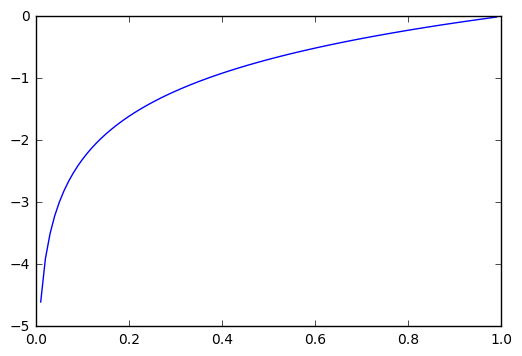

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#plt.xscale("log")
x = np.arange(0.0,1,0.01,"float")
y = np.log(x)

plt.plot(x,y)
plt.show()

　上記図のように、自然対数はxが「1」のときに、yは「0」になり、xが「0」に近づくにつれてyの値はどんどん小さくなります。そのため交差エントロピー誤差は、正解ラベルに対するニューラルネットの出力(確率)が高いほど0に近づきます。そして、正解ラベルに対する出力が小さい場合、値が大きくなることもわかります。(マイナスを乗じているので)
<br>それでは、交差エントロピー誤差を実装しましょう。 

In [17]:
##交差エントロピー誤差を計算する関数を定義
def cross_entropy_error(y,t):
    delta = 1e-7 #マイナス無限大対策
    return -np.sum(t * np.log(y + delta))

##実際に計算してみる。
import numpy as np
#2を正解とする（教師データ）
t = [0,0,1,0,0,0,0,0,0,0] 

#例1 :「２」の確率が最も高い場合(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))
print("例1：2の確率が高い場合　" + str(cross_entropy_error(np.array(y),np.array(t))))

#例2 :「７」の確率が最も高い場合(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))
print("例2：7の確率が高い場合　" + str(cross_entropy_error(np.array(y),np.array(t))))

例1：2の確率が高い場合　0.510825457099
例2：7の確率が高い場合　2.30258409299


 例１(正解と出力が一致)は、正解ラベルと一致するニューラルネットの出力(確率)が0.6で、このときの交差エントロピー誤差は約0.51です。一方、例2(正解と出力が不一致)の場合は、正解ラベルと一致するニューラルネットの出力が0.1で、交差エントロピー誤差は約2.3と高くなることがわかります。

<br>※交差エントロピー誤差関数では、微小な値である delta を足して計算しています。これは、np.log(0) の ような計算が発生した場合、np.log(0) はマイナスの無限大を表す-inf となり、そうなってしまうと、それ以上計算を進めることができなくなります。その防止策として、微小な値を追加して、マイナス無限大を発生させないようにしています。

## 4.2.3　ミニバッチ学習

　機械学習の問題は、訓練データに対する損失関数を求め、その値をできるだけ小さくするようなパラメータを探し出すということです。そのため訓練データが100個あれば、その100個の損失関数の和を指標とします。例えば、交差エントロピー誤差ですべての損失関数の和を求める場合、次のようになります。
 
 $$E=-\frac{1}{N}\displaystyle\sum_{n}^{}\displaystyle\sum_{k}^{}t_{nk}\log y_{nk}$$

 これは、ひとつのデータに対する交差エントロピー誤差を求める式を、単にＮ個分のデータに拡張しただけです。最後にＮ個で割って正規化(平均化)しています。こうしておくことで、訓練データが大量になった場合でも統一した指標で比較できます。

 ところで、MINISTデータは訓練データが60,000個と大量にあり、処理速度に影響がでる可能性があります（ましてやビッグデータを扱うなら・・・）。そこで、訓練データからある枚数だけを選び出し(ミニバッチ)、ミニバッチごとに学習をおこないます。これをミニバッチ学習と言います。
<br>それでは、訓練データから指定された個数のデータ(ミニバッチ)を、ランダムに取り出すコードを書いてみましょう。

In [2]:
#ご自身のPATHを指定してください。
path = "C:\\Users\\satoshi\\Desktop\\DeepLearning_Study\\deep-learning-from-scratch-master\\ch01"

#各種import
import sys, os
import numpy as np
os.chdir(path)
sys.path.append(os.pardir)
#特にmnist関数をインポート
from dataset.mnist import load_mnist

#MNISTデータセットの読み込み。最初の呼び出しは数分待ちます
(x_train, t_train),(x_test,t_test) = load_mnist(normalize = True, one_hot_label = True)

#訓練データが60,000個あり、入力データが784次元(28×28)であることの確認
print(x_train.shape)
#教師データが10次元データであることの確認
print(t_train.shape)

##訓練データからランダムに10枚抜き出す処理（ミニバッチ）
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
#ミニバッチとして取り出すインデックスを確認
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
#ミニバッチが取り出されていることを確認
print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)
[41925 43059 10195 23415 53114 23191 49122 56662 35963 52752]
(10, 784)
(10, 10)


## 4.2.4　【バッチ対応版】交差エントロピー誤差の実装

　では、ミニバッチに対応した交差エントロピー誤差を実装してみましょう。
　例は、教師データがone-hot表現で与えられる場合です。one-hot以外の場合は教科書を確認してください。

In [22]:
def cross_entropy_error(y,t):
    delta = 1e-7 #マイナス無限大対策
    
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    print(batch_size)
    return -np.sum(t * np.log(y + delta)) / batch_size

##上記のコードで設定済みのバッチ数10を使って実行してみる
y_batch = np.empty((0,10))
print(y_batch)
for i in range(10):
    dm_batch = np.array(np.random.rand(10))
    #a = np.r_[a,b.reshape(1,-1)]
    y_batch = np.r_[y_batch , dm_batch.reshape(1,-1)]
    
print(y_batch)
print(t_batch)
#y_batch = 
result = cross_entropy_error(y_batch,t_batch)
print(result)

[]
[[ 0.86094853  0.84872725  0.79110789  0.40970111  0.94098277  0.0567429
   0.9904154   0.95205925  0.58975359  0.60197176]
 [ 0.28022456  0.19519843  0.33346739  0.26898108  0.07615626  0.3992573
   0.86480462  0.53963582  0.56948716  0.72549039]
 [ 0.00344016  0.3980288   0.53596307  0.09127167  0.93562066  0.26263358
   0.62039035  0.12055518  0.3310635   0.01588555]
 [ 0.63838081  0.81823976  0.40962994  0.20926959  0.66635333  0.94983957
   0.26547824  0.3345301   0.90413152  0.14510172]
 [ 0.56672855  0.19835813  0.89809675  0.27652551  0.31179973  0.13134176
   0.72745473  0.4702393   0.42178454  0.77067559]
 [ 0.95179222  0.72958605  0.03078512  0.81818841  0.13521398  0.13011484
   0.50253071  0.85723353  0.96857217  0.2753736 ]
 [ 0.22405289  0.2952663   0.42082453  0.05491143  0.80686676  0.24501461
   0.14049472  0.18943616  0.09114968  0.15785935]
 [ 0.81132115  0.72988619  0.71525787  0.44835119  0.1259876   0.92648274
   0.1262667   0.17097819  0.85240194  0.47198942]

## 4.2.5　なぜ損失関数を設定するのか

わざわざ「損失関数」を導入せずとも、「認識精度」そのものを指標にすればよいのではないか？という疑問があるかもしれません。

ニューラルネットワークの学習では、最適なパラメータ(重みとバイアス)を探索する際に、損失関数の値ができるだけ小さくなるようなパラメータを探しますが、この作業は損失関数を微分することで行っています（詳細は次節）。認識精度を指標にすると、パラメータの微分がほとんどの場所で0になってしまい、パラメータを探す作業が行えないです<sub>※</sub>。認識精度はパラメータの微小な変化にほとんど反応を示さず、もし反応があっても値が不連続に変化するためです。したがって、損失関数という指標を用います。

<br>※例えば、あるニューラルネットワークが現在100枚ある訓練データの中で32枚正しく認識できているとします(認識率32%)。このときに重みパラメータの値を少し変えただけでは、、認識精度の32%は変化しないでしょう。つまり、パラメータの少しの調整だけでは、認識精度は改善されず一定のままなのです。仮に、改善されたとしても、32.0123…のような連続的な変化ではなく33%、34%のように不連続な値となるでしょう。一方、損失関数を指標とした場合、現在の損失関数の値が092543…のような場合、パラメータ少しの変化で0.93432…のように連続的に変化するのです。
